General imports made to make the code function

In [1]:
# Used imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Reading all the csv's

In [2]:
df_deelnemeners = pd.read_csv('Data - Zuivere dataset/HealthyLIFE_datadump_03-2023_1.csv', sep=';')
df_fitheids_scan = pd.read_csv('Data - Zuivere dataset/HealthyLIFE_datadump_03-2023_2.csv', sep=';')

Bewerken van de df_deelnemers dataset uit de aangeleverde set data van Roel

In [3]:
df_deelnemeners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426 entries, 0 to 2425
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2426 non-null   int64 
 1   Geslacht         2426 non-null   object
 2   Woonplaats       2426 non-null   object
 3   Postcode         1702 non-null   object
 4   Beweegcoach1     1609 non-null   object
 5   Leefstijlcoach1  2214 non-null   object
 6   age              2426 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 132.8+ KB


In [4]:
# Checking values in columns
for col in df_deelnemeners.columns:
    try:
        print('{} : {}'.format(col,df_deelnemeners[col].unique()))
    except:
        print(col)

Id : [   1    2    3 ... 2663 2664 2665]
Geslacht : ['V' 'M']
Woonplaats : ['Sittard' 'Geleen' 'Beek' 'Born' 'Maasgouw' 'Schinnen' 'Roermond' 'Stein'
 'Echt-Susteren' 'Test' 'Roerdalen' 'Weert' 'Beekdaelen' 'Breda'
 'Kerkrade' 'Heerlen']
Postcode : ['6132HA' '6136ex' '6136DD' ... '6456AP' '6155LP' '6461 TB']
Beweegcoach1 : ['Marnik Gommers' 'Chantal Bos' nan 'Veri Dautzenberg'
 'Beweegcoach Medisport' 'Wesley Latuhihin' 'Student Fontys/CIOS'
 'Sonny Idili' 'Beweegcoach Health & Sports' 'Marloes Hagemans'
 'Beweegcoach Sanders' 'Beweegcoach FysioQ' 'Ghislaine Groenen-Lof'
 'Wies Vriezen-Vallen' 'Beweegcoach Maasgouw'
 'Beweegcoach Personal Fitness' 'Rik Goessens' 'Beweegcoach HappyFit'
 'Beweegcoach Snijders' 'Dimphy van de Laar' 'Yvanca Evers'
 'Beweegcoach Weert' 'Mart Coolen' 'Rianne Wierda' 'Jessie Boumans'
 'Rik Schoenmaeckers' 'Marc Wanders' 'Sharon Wolfs' 'Melissa Visseren'
 'Suzan Vermeere' 'Reggy Mohamad Jakaria' 'Cas van Hinthem' 'Cindy Royen'
 'Jeroen von L�mich' 'Jordi Crans

In [5]:
# Rename columns
df_deelnemeners.rename(columns={'Id': 'DeelnemerID'}, inplace=True)

# Adding columns
df_deelnemeners['Gemeente'] = df_deelnemeners['Woonplaats']

# Replace values
df_deelnemeners['Gemeente'] = df_deelnemeners['Gemeente'].replace(['Born', 'Geleen', 'Sittard'], 'Sittard-Geleen')
df_deelnemeners['Gemeente'] = df_deelnemeners['Gemeente'].replace(['Beekdaelen'], 'Onderbanken') # Scince the cbs data uses the old Gemeentes we also use them

# Dropping row with specific testing value
df_deelnemeners.drop(df_deelnemeners[df_deelnemeners['Gemeente'] == 'Test'].index, inplace = True)

# Dropping columns
df_deelnemeners.drop(columns=['Woonplaats', 'Postcode', 'Beweegcoach1', 'Leefstijlcoach1'], inplace = True)

# Convert datatypes
df_deelnemeners['DeelnemerID'] = df_deelnemeners['DeelnemerID'].astype(int)

# Display the modified DataFrame
df_deelnemeners

,DeelnemerID,Geslacht,age,Gemeente
0,1,V,51,Sittard-Geleen
1,2,V,45,Sittard-Geleen
2,3,V,68,Sittard-Geleen
3,4,M,64,Sittard-Geleen
4,5,V,63,Sittard-Geleen
...,...,...,...,...
2421,2661,V,47,Onderbanken
2422,2662,V,29,Sittard-Geleen
2423,2663,V,66,Maasgouw
2424,2664,M,52,Maasgouw


Bewerken van de df_fitheids_scan dataset

In [6]:
df_fitheids_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DeelnemerID  3193 non-null   float64
 1   Datum        3197 non-null   object 
 2   Lengte       3195 non-null   object 
 3   Gewicht      3178 non-null   object 
 4   6 MWT        3120 non-null   object 
 5   TUG          3130 non-null   object 
 6   BMI          3196 non-null   object 
 7   Conditie     3197 non-null   object 
 8   Lenigheid    3006 non-null   object 
 9   Knijpkracht  3197 non-null   object 
 10  #meting      3197 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 274.9+ KB


In [7]:
# Convert 'DeelnemerID' column to int
df_fitheids_scan['DeelnemerID'] = df_fitheids_scan['DeelnemerID'].astype(pd.Int64Dtype())

# Replace commas with periods and convert columns to float
columns_to_convert = ['Lengte', 'Gewicht', '6 MWT', 'TUG', 'BMI', 'Conditie', 'Lenigheid', 'Knijpkracht']
df_fitheids_scan[columns_to_convert] = df_fitheids_scan[
    columns_to_convert].astype(str).apply(lambda x: x.str.replace(',', '.')).astype(float)

# Drop Columns
df_fitheids_scan.drop(columns=['Datum'], inplace=True)

# Display the modified DataFrame
df_fitheids_scan

,DeelnemerID,Lengte,Gewicht,6 MWT,TUG,BMI,Conditie,Lenigheid,Knijpkracht,#meting
0,1,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,1
1,1,159.0,95.3,448.0,9.30,37.700000,0.695091,0.00,45.8,2
2,2,175.0,89.1,596.0,5.82,29.093878,0.806495,27.00,34.0,1
3,2,170.0,86.0,556.0,5.50,29.757785,0.779192,29.25,29.0,3
4,3,151.5,94.8,512.0,6.84,41.303140,1.054387,19.00,20.3,2
...,...,...,...,...,...,...,...,...,...,...
3192,2409,182.0,130.0,543.5,6.00,39.246468,0.834113,NaN,45.6,1
3193,2341,184.5,139.2,558.0,6.20,40.892767,0.766821,14.50,84.7,2
3194,2340,158.6,107.4,486.0,7.00,42.697054,0.788393,486.00,33.7,2
3195,2337,175.5,111.0,557.0,6.40,36.038669,0.820348,25.50,68.2,2


Identify NaN values

In [8]:
nan_counts = df_fitheids_scan.isna().sum()
print(nan_counts)

DeelnemerID      4
Lengte           2
Gewicht         19
6 MWT           77
TUG             67
BMI              1
Conditie         0
Lenigheid      191
Knijpkracht      0
#meting          0
dtype: int64


<Axes: >

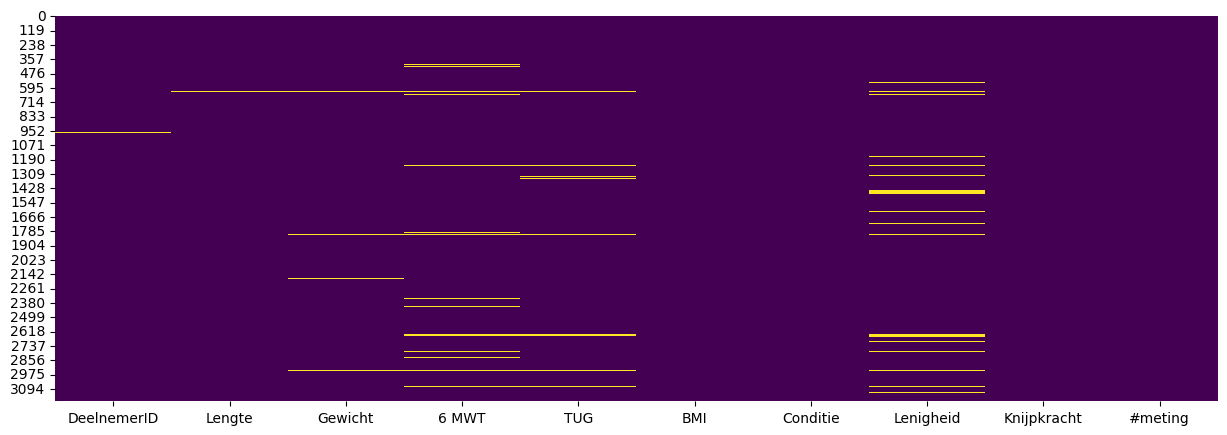

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fitheids_scan.isnull(),cbar=False,cmap='viridis')

Identify errors

In [10]:
# Remove rows with a BMI higher then 50 since this messes the plot
df_fitheids_scan = df_fitheids_scan[df_fitheids_scan['BMI'] <= 50]

# Create box plots for each column
fig = px.box(df_fitheids_scan, y=['Lengte', 'Gewicht', '6 MWT', 'TUG', 'BMI', 'Conditie', 'Lenigheid', 'Knijpkracht'], facet_col_wrap=4)

# Update the layout and show the figure
fig.update_layout(height=600, width=800, title_text="Box Plots")
fig.show()

Remove errors

*The error values will be set to NaN, so this target variable can be dropped later. This because the other values in this data may be usefull*

In [11]:
df_fitheids_scan.loc[~(df_fitheids_scan['Gewicht'] > 0), 'Gewicht'] = np.nan
df_fitheids_scan.loc[~(df_fitheids_scan['6 MWT'] > 100), '6 MWT'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['TUG'] > 0) & (df_fitheids_scan['TUG'] < 100)), 'TUG'] = np.nan
df_fitheids_scan.loc[~(df_fitheids_scan['BMI'] > 0), 'BMI'] = np.nan
df_fitheids_scan.loc[~(df_fitheids_scan['Lenigheid'] < 200), 'Lenigheid'] = np.nan
df_fitheids_scan.loc[~(df_fitheids_scan['Knijpkracht'] > 0), 'Knijpkracht'] = np.nan

Identify incorrect data

In [12]:
# Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_fitheids_scan.columns:
    try:
        print('{} : {}'.format(col,df_fitheids_scan[col].unique()))
    except:
        print(col)

DeelnemerID : <IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   14,
 ...
 2426, 2225, 2416, 2411, 2417, 2412, 2408, 2223, 2407, 2409]
Length: 1726, dtype: Int64
Lengte : [159.  175.  170.  151.5 168.  169.  158.  162.  160.5 152.5 152.  153.
 155.  155.1 156.5 156.  177.  167.  167.5 185.5 158.5 170.5 154.  160.4
 166.5 173.  163.  163.5 164.5 164.  165.  181.5 186.5 174.  180.  180.5
 174.7 174.5 170.3 176.  178.  165.5 164.6 148.5 160.  175.5 170.9 171.
 187.9 188.  173.5 173.6 172.  172.5 149.4 156.2 166.  157.5 165.8 179.
 178.5 178.2 161.  161.5 169.5 178.1 168.5 153.8 153.9 153.4 182.  178.4
 162.5 155.5 161.6 191.  164.9 184.  190.2 164.7 183.5 186.  165.4 189.
 154.2 183.  149.  182.5 181.  160.2 187.  174.1 157.6 164.3 172.7 177.5
 150.  173.8 189.5 176.2 184.1 170.7 176.7 170.4 159.5 169.4 159.4 176.5
 168.4 168.3 164.4 197.5 180.4 166.1   nan 178.6 180.6 180.7 179.2 179.3
 164.2 168.7 150.4 160.6 179.4 160.3 162.1 155.3 159.9 166.3 165.3 174.8
 163.2 16

Drop incorrect data

In [13]:
df_fitheids_scan = df_fitheids_scan[(df_fitheids_scan['DeelnemerID'] != '<NA>')]

Measure differences beween

In [14]:
nan_counts = df_fitheids_scan.isna().sum()
print(nan_counts)

DeelnemerID      0
Lengte           1
Gewicht         19
6 MWT          104
TUG             78
BMI             19
Conditie         0
Lenigheid      188
Knijpkracht     70
#meting          0
dtype: int64


In [15]:
# Sorteer het dataframe op deelnemers id en sessie id
df_fitheids_scan.sort_values(['DeelnemerID', '#meting'], inplace=True)

# Groepeer de gegevens op deelnemers id en bereken het verschil
for column in ['Lengte', 'Gewicht', '6 MWT', 'TUG', 'BMI', 'Conditie', 'Lenigheid', 'Knijpkracht']:
    df_fitheids_scan['verschil_'+column] = df_fitheids_scan.groupby('DeelnemerID')[column].diff()
    df_fitheids_scan.drop(columns=[column], inplace=True)

# Groepeer de gegevens op deelnemers id en bereken het verschil in dagen voor een datum
df_fitheids_scan['verschil_meting'] = df_fitheids_scan.groupby('DeelnemerID')['#meting'].diff()

# Verwijder de rijen waarin het verschil in gewicht NaN is (eerste sessie)
df_fitheids_scan = df_fitheids_scan[df_fitheids_scan['verschil_meting'] >= 1]

# Drop columns
df_fitheids_scan.drop(columns=['#meting'], inplace=True)

df_fitheids_scan

,DeelnemerID,verschil_Lengte,verschil_Gewicht,verschil_6 MWT,verschil_TUG,verschil_BMI,verschil_Conditie,verschil_Lenigheid,verschil_Knijpkracht,verschil_meting
1,1,0.0,-2.3,-52.0,2.94,-0.906068,-0.125200,-31.50,30.8,1.0
3,2,-5.0,-3.1,-40.0,-0.32,0.663908,-0.027304,2.25,-5.0,2.0
5,3,0.0,-7.2,-104.0,-2.43,-3.133140,-0.384503,-4.00,11.5,1.0
7,4,1.0,-4.9,63.0,-1.92,-2.143719,0.080729,7.50,2.7,1.0
8,4,0.0,2.5,120.0,1.84,0.875319,0.194016,NaN,-0.8,1.0
...,...,...,...,...,...,...,...,...,...,...
3089,2657,0.0,-9.9,5.0,0.40,-3.160011,-0.018652,1.50,5.3,1.0
3087,2659,0.0,-2.4,64.0,1.00,-0.732578,0.086585,0.00,-1.6,1.0
3093,2660,0.0,0.0,25.0,-0.50,0.000000,0.048470,1.75,1.5,1.0
3088,2661,0.0,-4.6,45.0,-0.60,-1.710292,0.059816,4.00,2.4,1.0


<Axes: >

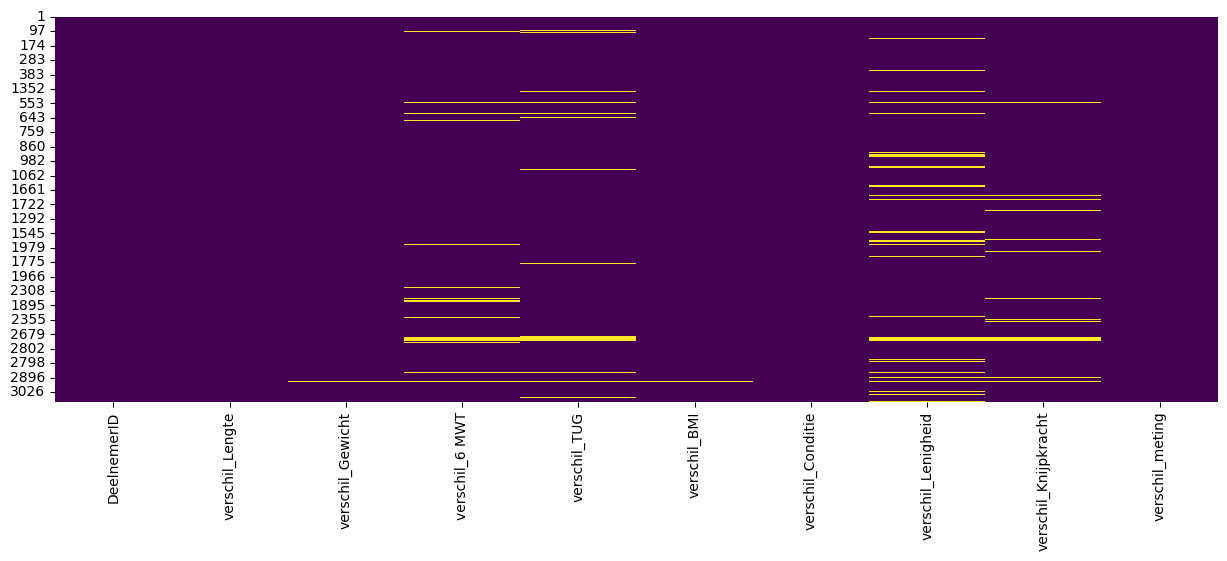

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fitheids_scan.isnull(),cbar=False,cmap='viridis')

Get weekly difference

In [17]:
df_fitheids_scan.columns

Index(['DeelnemerID', 'verschil_Lengte', 'verschil_Gewicht', 'verschil_6 MWT',
       'verschil_TUG', 'verschil_BMI', 'verschil_Conditie',
       'verschil_Lenigheid', 'verschil_Knijpkracht', 'verschil_meting'],
      dtype='object')

In [18]:
# Calculate weekly differences
for column in ['verschil_Lengte', 'verschil_Gewicht', 'verschil_6 MWT', 'verschil_TUG', 'verschil_BMI',
               'verschil_Conditie', 'verschil_Lenigheid', 'verschil_Knijpkracht']:
    
    # Calculate the weekly differences using .loc accessor
    df_fitheids_scan[column] = df_fitheids_scan[column] / df_fitheids_scan['verschil_meting']

Identify outliers

In [19]:
# Remove rows insane values since this messes the plot
df_fitheids_scan = df_fitheids_scan[df_fitheids_scan['verschil_Lenigheid'] <= 3000]

# Create box plots for each column
fig = px.box(df_fitheids_scan, y=['verschil_Lengte', 'verschil_Gewicht',
               'verschil_6 MWT', 'verschil_TUG',
               'verschil_BMI', 'verschil_Conditie',
               'verschil_Lenigheid', 'verschil_Knijpkracht'], facet_col_wrap=4)

# Update the layout and show the figure
fig.update_layout(height=600, width=800, title_text="Box Plots")
fig.show()

In [20]:
# Remove extreme outliers (probabbly errors)
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_Lengte'] >= -1.5) & (df_fitheids_scan['verschil_Lengte'] <= 1.5)), 'verschil_BMI'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_Lengte'] >= -1.5) & (df_fitheids_scan['verschil_Lengte'] <= 1.5)), 'verschil_Lengte'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_Gewicht'] >= -20) & (df_fitheids_scan['verschil_Gewicht'] <= 20)), 'verschil_BMI'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_Gewicht'] >= -20) & (df_fitheids_scan['verschil_Gewicht'] <= 20)), 'verschil_Gewicht'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_6 MWT'] >= -200) & (df_fitheids_scan['verschil_6 MWT'] <= 300)), 'verschil_6 MWT'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_TUG'] >= -7) & (df_fitheids_scan['verschil_TUG'] <= 7)), 'verschil_TUG'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_BMI'] >= -7) & (df_fitheids_scan['verschil_BMI'] <= 7)), 'verschil_BMI'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_Conditie'] >= -1) & (df_fitheids_scan['verschil_Conditie'] <= 1)), 'verschil_Conditie'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_Lenigheid'] >= -30) & (df_fitheids_scan['verschil_Lenigheid'] <= 30)), 'verschil_Lenigheid'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['verschil_Knijpkracht'] >= -35) & (df_fitheids_scan['verschil_Knijpkracht'] <= 35)), 'verschil_Knijpkracht'] = np.nan

In [21]:
nan_counts = df_fitheids_scan.isna().sum()
print(nan_counts)

DeelnemerID              0
verschil_Lengte         37
verschil_Gewicht        10
verschil_6 MWT          51
verschil_TUG            34
verschil_BMI            47
verschil_Conditie        8
verschil_Lenigheid       6
verschil_Knijpkracht    34
verschil_meting          0
dtype: int64


<Axes: >

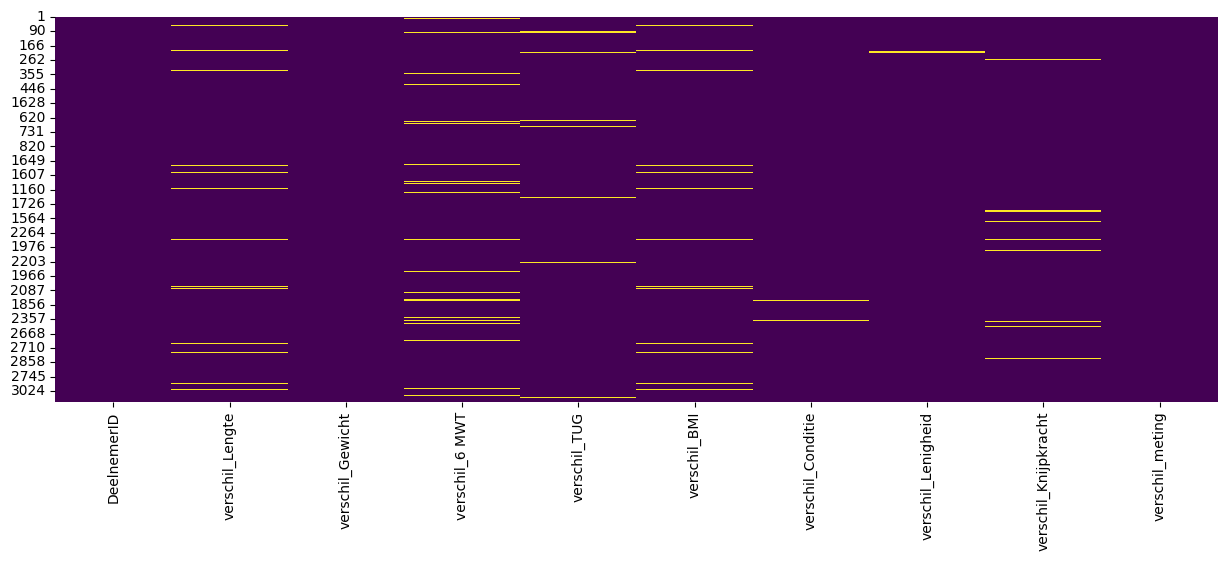

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fitheids_scan.isnull(),cbar=False,cmap='viridis')

Check wierd values like a big difference in lenght

In [23]:
# Checking for incorrect data
for col in df_fitheids_scan.columns:
    try:
        print('{} : {}'.format(col,df_fitheids_scan[col].unique()))
    except:
        print(col)

DeelnemerID : <IntegerArray>
[   1,    2,    3,    4,    5,    6,    8,    9,   14,   15,
 ...
 2600, 2601, 2602, 2652, 2655, 2656, 2657, 2659, 2660, 2661]
Length: 956, dtype: Int64
verschil_Lengte : [ 0.     nan  1.   -0.5   0.5   0.1   0.25 -1.   -0.2   0.3  -0.4   0.2
 -0.1   0.4   0.1  -0.1  -1.5   1.5  -0.3  -1.2   1.2  -0.7   0.4  -1.1
 -1.3   0.7  -0.25 -0.75  0.75  1.3  -0.6 ]
verschil_Gewicht : [ -2.3         -1.55        -7.2         -4.9         -1.3
   2.          -2.2         -3.2          0.2          1.9
  -0.5         -6.7          5.7         -1.1         -0.2
   0.5          2.4         -1.1         -2.9         -2.
   0.1         -6.9         -7.3         -1.1          1.3
  -2.9          3.8                 nan  -0.7         -3.9
  -6.6          1.7         -2.6         -8.9          1.5
   0.3         -3.6         -0.6          0.          -3.4
  -2.5         -3.9         -4.6         -4.5         -0.9
   1.          -1.9        -10.          -4.4         -1.5
   3

**Merging dataframes**

Merge df_deelnemers & df_fitheids_scan en verwijder de losse datasets hierna

In [24]:
# Converting DeelnemerID to INT to merge properly
df_deelnemeners['DeelnemerID'] = df_deelnemeners['DeelnemerID'].astype(pd.Int64Dtype())

# Merge df_deelnemers & df_fitheids_scan
df_healthy_life = pd.merge(df_fitheids_scan, df_deelnemeners, on='DeelnemerID')

# Delete df_deelnemers & df_fitheids_scan for minimalizing the ram usage
del df_fitheids_scan, df_deelnemeners


df_healthy_life.info()

df_healthy_life

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeelnemerID           1257 non-null   Int64  
 1   verschil_Lengte       1220 non-null   float64
 2   verschil_Gewicht      1247 non-null   float64
 3   verschil_6 MWT        1206 non-null   float64
 4   verschil_TUG          1223 non-null   float64
 5   verschil_BMI          1210 non-null   float64
 6   verschil_Conditie     1249 non-null   float64
 7   verschil_Lenigheid    1251 non-null   float64
 8   verschil_Knijpkracht  1223 non-null   float64
 9   verschil_meting       1257 non-null   float64
 10  Geslacht              1257 non-null   object 
 11  age                   1257 non-null   int64  
 12  Gemeente              1257 non-null   object 
dtypes: Int64(1), float64(9), int64(1), object(2)
memory usage: 129.0+ KB


,DeelnemerID,verschil_Lengte,verschil_Gewicht,verschil_6 MWT,verschil_TUG,verschil_BMI,verschil_Conditie,verschil_Lenigheid,verschil_Knijpkracht,verschil_meting,Geslacht,age,Gemeente
0,1,0.0,-2.30,-52.0,2.94,-0.906068,-0.125200,NaN,30.8,1.0,V,51,Sittard-Geleen
1,2,NaN,-1.55,-20.0,-0.16,NaN,-0.013652,1.125,-2.5,2.0,V,45,Sittard-Geleen
2,3,0.0,-7.20,-104.0,-2.43,-3.133140,-0.384503,-4.000,11.5,1.0,V,68,Sittard-Geleen
3,4,1.0,-4.90,63.0,-1.92,-2.143719,0.080729,7.500,2.7,1.0,M,64,Sittard-Geleen
4,5,0.0,-1.30,23.0,-2.07,-0.521359,0.020537,4.250,-1.7,1.0,V,63,Sittard-Geleen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2656,0.0,-0.20,42.0,-0.40,-0.059721,0.062730,-4.500,4.5,1.0,M,59,Onderbanken
1253,2657,0.0,-9.90,5.0,0.40,-3.160011,-0.018652,1.500,5.3,1.0,V,43,Onderbanken
1254,2659,0.0,-2.40,64.0,1.00,-0.732578,0.086585,0.000,-1.6,1.0,M,63,Onderbanken
1255,2660,0.0,0.00,25.0,-0.50,0.000000,0.048470,1.750,1.5,1.0,V,64,Onderbanken


In [25]:
# Checking values in columns
for col in df_healthy_life.columns:
    try:
        print('{} : {}'.format(col,df_healthy_life[col].unique()))
    except:
        print(col)

DeelnemerID : <IntegerArray>
[   1,    2,    3,    4,    5,    6,    8,    9,   14,   15,
 ...
 2600, 2601, 2602, 2652, 2655, 2656, 2657, 2659, 2660, 2661]
Length: 956, dtype: Int64
verschil_Lengte : [ 0.     nan  1.   -0.5   0.5   0.1   0.25 -1.   -0.2   0.3  -0.4   0.2
 -0.1   0.4   0.1  -0.1  -1.5   1.5  -0.3  -1.2   1.2  -0.7   0.4  -1.1
 -1.3   0.7  -0.25 -0.75  0.75  1.3  -0.6 ]
verschil_Gewicht : [ -2.3         -1.55        -7.2         -4.9         -1.3
   2.          -2.2         -3.2          0.2          1.9
  -0.5         -6.7          5.7         -1.1         -0.2
   0.5          2.4         -1.1         -2.9         -2.
   0.1         -6.9         -7.3         -1.1          1.3
  -2.9          3.8                 nan  -0.7         -3.9
  -6.6          1.7         -2.6         -8.9          1.5
   0.3         -3.6         -0.6          0.          -3.4
  -2.5         -3.9         -4.6         -4.5         -0.9
   1.          -1.9        -10.          -4.4         -1.5
   3

Inzicht in waardes

In [26]:
import pandas as pd

information_data = {
    'column': [],
    'mean': [],
    'max': [],
    'min': []
}

for column in ['verschil_Lengte', 'verschil_Gewicht',
               'verschil_6 MWT', 'verschil_TUG',
               'verschil_BMI', 'verschil_Conditie',
               'verschil_Lenigheid', 'verschil_Knijpkracht']:
    information_data['column'].append(column)
    information_data['mean'].append(df_healthy_life[column].mean(skipna=True))
    information_data['max'].append(df_healthy_life[column].max(skipna=True))
    information_data['min'].append(df_healthy_life[column].min(skipna=True))
    
information_data = pd.DataFrame.from_dict(information_data)
information_data = information_data.set_index("column")
information_data


,mean,max,min
column,,,
verschil_Lengte,0.026926,1.500000,-1.500000
verschil_Gewicht,-1.501991,13.300000,-19.000000
verschil_6 MWT,27.966667,284.000000,-200.000000
verschil_TUG,-0.481585,5.320000,-7.000000
verschil_BMI,-0.529347,5.372269,-6.030354
verschil_Conditie,0.037099,0.902107,-0.964562
verschil_Lenigheid,0.767699,28.000000,-30.000000
verschil_Knijpkracht,0.896784,32.400000,-25.000000


Export data

In [27]:
df_healthy_life.drop(columns=['DeelnemerID'], inplace=True)

In [28]:
df_healthy_life.to_csv('healthylife_prep.csv', index=False)  